![alt text](https://old.iesb.br/Cms_Data/Sites/Portal/Themes/vestibular2019/src/favicon.ico/android-icon-192x192.png)

# <font color='PURPLE'>Pós Graduação em Ciência de Dados</font>

# <font color='GREY'> Detecção de Fraude em Cartão de Crédito</font>



![alt text](https://www.cursodeecommerce.com.br/wp-content/uploads/2016/08/tipos-de-fraudes-com-cartoes-de-credito-em-lojas-virtuais.jpg)

https://www.kaggle.com/mlg-ulb/creditcardfraud

# 1° Problema de Negócio

* Os conjuntos de dados **contêm transações** feitas por cartões de crédito em setembro de 2013 por titulares de cartões europeus.

* Este conjunto de dados apresenta as transações que ocorreram em dois dias, onde **temos 492 fraudes em 284.807 transações**. O conjunto de dados é altamente desequilibrado, a classe positiva (fraudes) é responsável por 0,172% de todas as transações.

* Ele contém apenas variáveis ​​de entrada numéricas que são o resultado de uma **transformação PCA**. Infelizmente, devido a questões de **confidencialidade**, não podemos fornecer os recursos originais e mais informações básicas sobre os dados. Os recursos V1, V2,… V28 são os componentes principais obtidos com o PCA, os únicos recursos que não foram transformados com o PCA são 'Tempo' e 'Quantidade'. 

* O recurso 'Tempo' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. O recurso 'Amount' é o Amount da transação, esse recurso pode ser usado, por exemplo, para estudos diversos. 

* O recurso **'Classe' é a variável de resposta** e assume o valor 1 em caso de fraude e 0 em caso contrário.



# 2° Análise Exploratória dos Dados

In [2]:
# Desativando os avisos sobre as bibliotecas depreciadas:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [7]:
# Bibliotecas utilizadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [6]:
#!pip install imblearn

In [8]:
# Lendo os Dados
df = pd.read_csv('content/creditcard.csv')

In [9]:
# Informações dos Atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# Visualizando algumas linhas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
# Verificando valores missing
# (verificar linhas duplicadas)
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

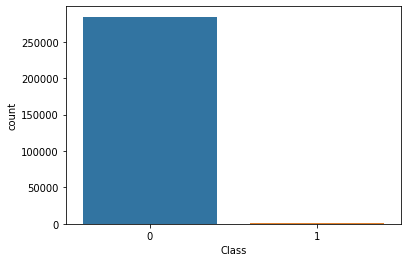

In [17]:
# Dando uma olhada na variável Target
ax = sns.countplot(x="Class", data=df) # 1- Fraude

In [18]:
number_of_fraud = len(df[df.Class == 1])
number_of_normal= len(df[df.Class == 0])

print(f'Fraude: {number_of_fraud}  - {round(((number_of_fraud*100)/len(df.Class)),3)}%')
print(f'Normal: {number_of_normal} - {round(((number_of_normal*100)/len(df.Class)),3)}%')

Fraude: 492  - 0.173%
Normal: 284315 - 99.827%


In [19]:
df[df.Class == 1].describe() #Fraudes - possibilita ver Amount em relação a Fraudes

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [20]:
print("Tempo das Transações de Fraude: ",df.Time[df.Class == 1].sum()/number_of_fraud) #Media do Tempo para as Fraudes
print("Tempo das Transações Normal: ",df.Time[df.Class == 0].sum()/number_of_normal) #Media do Tempo para as Normal

Tempo das Transações de Fraude:  80746.80691056911
Tempo das Transações Normal:  94838.20225805884


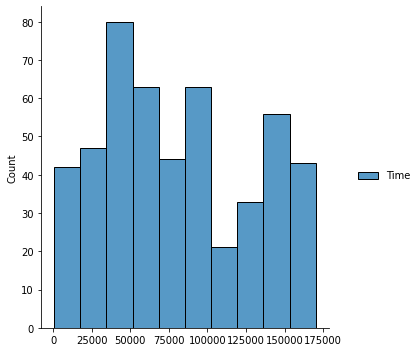

In [21]:
# Grafico tempo de trasações Fraudulentas
def executarGraficoF():
    try:
        sns.displot([df.Time[df.Class == 1]])
        plt.show()
    except ValueError as err:
        print(err)
    
executarGraficoF()

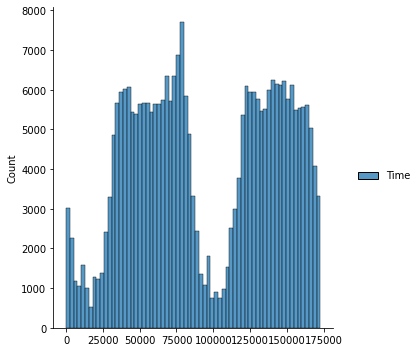

In [22]:
# Grafico tempo de trasações Normais
def executarGraficoN():
    try:
        sns.displot([df.Time[df.Class == 0]])
        plt.show()
    except ValueError as err:
        print(err)
    
executarGraficoN()

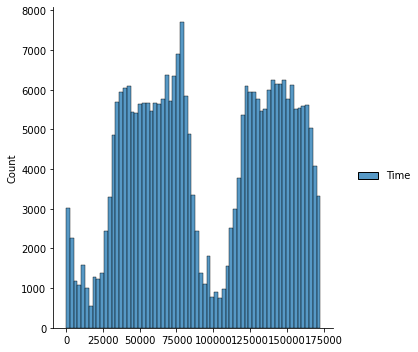

In [23]:
# Grafico dos tempos de transações gerais
def executarGraficoT():
    try:
        sns.displot([df['Time']])
        plt.show()
    except ValueError as err:
        print(err)
    
executarGraficoT()

Normal


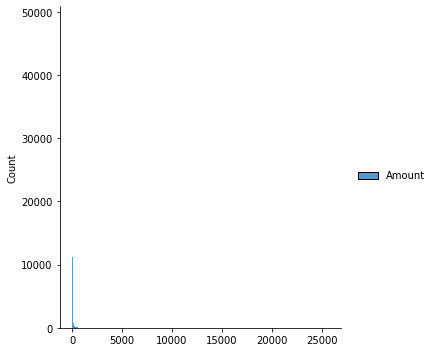

In [25]:
# Grafico Amount(Total) de trasações Normais
def executarGraficoA():
    try:
        print("Normal")
        sns.displot([df.Amount[df.Class == 0]])
        plt.show()
    except ValueError as err:
        print(err)
    
executarGraficoA()


Fraude


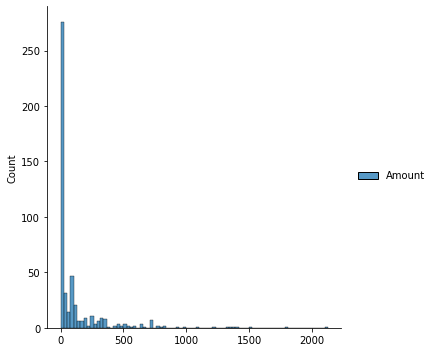

In [26]:
print()
# Grafico Amount(Total) de trasações Fraudulentas
def executarGraficoAf():
    try:
        print("Fraude")
        sns.displot([df.Amount[df.Class == 1]])
        plt.show()
    except ValueError as err:
        print(err)
    
executarGraficoAf()

In [27]:
timeFraude = df.Time[df.Class == 1].describe() # estatisticas do Time x Class(Fraude)
print(timeFraude)

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


In [28]:
timeNormal = df.Time[df.Class == 0].describe() # estatisticas do Time x Class(Normal)
print(timeNormal)

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


#### Parece que as transações fraudulentas são distribuídas de maneira mais uniforme, enquanto as transações normais têm uma distribuição cíclica. Necessario olhar a quantidade.

In [29]:
print ("Fraude")
print (df.Amount[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Amount[df.Class == 0].describe())

Fraude
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [30]:
df.V11.describe()

count    2.848070e+05
mean     9.289524e-16
std      1.020713e+00
min     -4.797473e+00
25%     -7.624942e-01
50%     -3.275735e-02
75%      7.395934e-01
max      1.201891e+01
Name: V11, dtype: float64

#### Assimetria (skewness): mede o grau de simetria da curva, em relação a distribuição normal.

![alt text](https://miro.medium.com/max/600/1*9451kH1-GPqdNyWdehmPeQ.jpeg)

In [31]:
def assimetria(mean,median):
  if mean < median :
      return "Left-Skewed - (Mean < Median)"
  elif median < mean :
      return "Right-Skewed - (Median < Mean)"
  else :
      return "Symmetric - (Mean = Median)"

mean   = round(df.V1[df.Class == 0].mean(),5) #V11 - Normal
median = round(df.V1[df.Class == 0].median(),5) #V11 - Normal
std    = round(df.V1[df.Class == 0].std(),5)

# Assimetria (skewness): mede o grau de simetria da curva, em relação a distribuição normal.
# Positive Skew - Assimetrica a direita | Negative Skew - Assimetrica a esquerda
skew = round(df.V1[df.Class == 0].skew(),5) #V11 - Normal

print("=========== V1 X Class(Normal) - Assimetria =================")
print("Media = ",mean) #V11 - Normal
print("Mediana = ",median) #V11 - Normal
print("Devio padrão = ",std) #V11 - Normal
print("Assimetria = ",assimetria(mean,median)) #V11 - Normal
print("Skewness = ",skew) #V11 - Normal

mean   = round(df.V1[df.Class == 1].mean(),5) #V11 - Fraude
median = round(df.V1[df.Class == 1].median(),5) #V11 - Fraude
std    = round(df.V1[df.Class == 1].std(),5)
skew = round(df.V1[df.Class == 1].skew(),5) #V11 - Fraude

print("=========== V1 X Class(Fraude) - Assimetria =================")
print("Media = ",mean) #V11 - Fraude
print("Mediana = ",median) #V11 - Fraude
print("Devio padrão = ",std) #V11 - Fraude
print("Assimetria = ",assimetria(mean,median)) #V11 - Fraude
print("Skewness = ",skew) #V11 - Fraude

=========== V1 X Class(Normal) - Assimetria =================
Media =  0.00826
Mediana =  0.02002
Devio padrão =  1.92981
Assimetria =  Left-Skewed - (Mean < Median)
Skewness =  -3.13019
=========== V1 X Class(Fraude) - Assimetria =================
Media =  -4.77195
Mediana =  -2.3425
Devio padrão =  6.78369
Assimetria =  Left-Skewed - (Mean < Median)
Skewness =  -1.79762


In [32]:
mean   = round(df.V10[df.Class == 0].mean(),5) #V11 - Normal
median = round(df.V10[df.Class == 0].median(),5) #V11 - Normal
std    = round(df.V10[df.Class == 0].std(),5)

# Assimetria (skewness): mede o grau de simetria da curva, em relação a distribuição normal.
# Positive Skew - Assimetrica a direita | Negative Skew - Assimetrica a esquerda
skew = round(df.V10[df.Class == 0].skew(),5) #V11 - Normal

print("=========== V3 X Class(Normal) - Assimetria =================")
print("Media = ",mean) #V11 - Normal
print("Mediana = ",median) #V11 - Normal
print("Devio padrão = ",std) #V11 - Normal
print("Assimetria = ",assimetria(mean,median)) #V11 - Normal
print("Skewness = ",skew) #V11 - Normal

mean   = round(df.V10[df.Class == 1].mean(),5) #V11 - Fraude
median = round(df.V10[df.Class == 1].median(),5) #V11 - Fraude
std    = round(df.V10[df.Class == 1].std(),5)
skew   = round(df.V10[df.Class == 1].skew(),5) #V11 - Fraude

print("=========== V3 X Class(Fraude) - Assimetria =================")
print("Media = ",mean) #V11 - Fraude
print("Mediana = ",median) #V11 - Fraude
print("Devio padrão = ",std) #V11 - Fraude
print("Assimetria = ",assimetria(mean,median)) #V11 - Fraude
print("Skewness = ",skew) #V11 - Fraude

=========== V3 X Class(Normal) - Assimetria =================
Media =  0.00982
Mediana =  -0.09187
Devio padrão =  1.0442
Assimetria =  Right-Skewed - (Median < Mean)
Skewness =  2.42228
=========== V3 X Class(Fraude) - Assimetria =================
Media =  -5.67688
Mediana =  -4.57882
Devio padrão =  4.89734
Assimetria =  Left-Skewed - (Mean < Median)
Skewness =  -1.15272


In [33]:
mean = -0.00002
median = 0.00674
mode = -0.81626
print(mean < median < mode) # esquerda -
print(mode < median < mean) # direira +


False
False


In [34]:
print(mode > median)
print(median > mean)
print(mean > median > mode)#direita
print(mean < median < mode)#esquerda
print((mean > median) and (median > mode)) #direita
print((mode > median) and (median > mean)) #esquerda

False
True
False
False
False
False


#### Curtose (kurtosis): mede o grau de achatamento da curva, em relação a curva normal. Em python:

![alt text](https://miro.medium.com/max/474/1*mnaT1JqNbLhb_sSfT4SpkA.jpeg)

#### -Kurtosis = 0 -> tem uma distribuição mesocúrtica.
#### -Kurtosis > 0 -> leptocúrtica, correspondendo a uma curva mais pontuda.
#### -Kurtosis < 0 -> platicúrtica, ou seja, uma curva mais achatada, com maior variabilidade dos dados.

In [35]:
def curtose(x):
    kurtosis = round(x.kurtosis(),5) #V11 - Normal
    if kurtosis == 0 :
        print("Curtose: ",kurtosis," - Mesocúrtica - ( | = 0)")
    elif kurtosis > 0 :
        print("Curtose: ",kurtosis," - Leptocúrtica - ( | > 0)")
    else :
        print("Curtose: ",kurtosis," - Platicúrtica - ( | < 0)")


print("========= V2 X Class(Normal) - Curtose(Achatamento) =============")
curtose(df.V9[df.Class == 0]) #V11 - Normal
print("========= V2 X Class(Fraude) - Curtose(Achatamento) =============")
curtose(df.V9[df.Class == 1]) #V11 - Fraude

========= V2 X Class(Normal) - Curtose(Achatamento) =============
Curtose:  3.19685  - Leptocúrtica - ( | > 0)
========= V2 X Class(Fraude) - Curtose(Achatamento) =============
Curtose:  1.49489  - Leptocúrtica - ( | > 0)


In [141]:
df.V18[df.Class == 0].kurtosis()

0.8449064198817609

In [19]:
# Explorando as correlações com o Target(y)
df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [36]:
df2 = df.iloc[:,[0,1,2,3,4,29,30]] # separando Colunas para fazer correlação
df3 = df.iloc[:,[5,6,7,8,9,10,30]] # separando Colunas para fazer correlação
df4 = df.iloc[:,[11,12,13,14,15,16,30]] # separando Colunas para fazer correlação
df5 = df.iloc[:,[17,18,19,20,21,22,30]] # separando Colunas para fazer correlação
df6 = df.iloc[:,[23,24,25,26,27,28,30]] # separando Colunas para fazer correlação

##### Coeficiente de Correlação
![alt text](http://leg.ufpr.br/~silvia/CE003/img288.png)

<AxesSubplot:>

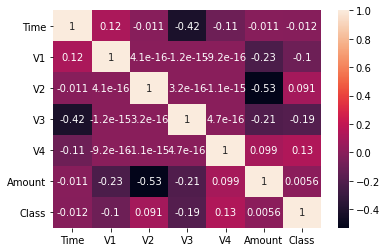

In [37]:
#Correlação entre as variaveis
rel2 = df2.corr()
sns.heatmap(rel2, xticklabels=rel2.columns, yticklabels=rel2.columns, annot=True)

<AxesSubplot:>

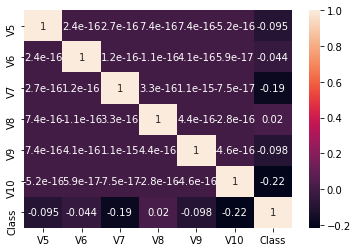

In [38]:
#Correlação entre as variaveis
rel3 = df3.corr()
sns.heatmap(rel3, xticklabels=rel3.columns, yticklabels=rel3.columns, annot=True)

<AxesSubplot:>

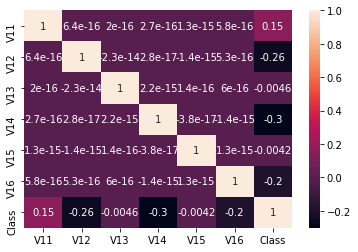

In [39]:
#Correlação entre as variaveis
rel4 = df4.corr()
sns.heatmap(rel4, xticklabels=rel4.columns, yticklabels=rel4.columns, annot=True)

<AxesSubplot:>

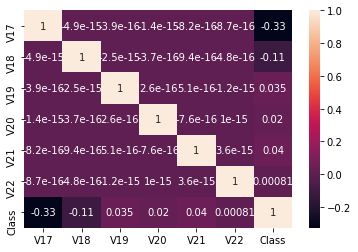

In [40]:
#Correlação entre as variaveis
rel5 = df5.corr()
sns.heatmap(rel5, xticklabels=rel5.columns, yticklabels=rel5.columns, annot=True)

<AxesSubplot:>

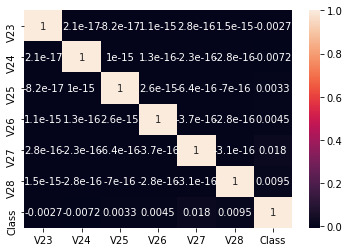

In [41]:
#Correlação entre as variaveis
rel6 = df6.corr()
sns.heatmap(rel6, xticklabels=rel6.columns, yticklabels=rel6.columns, annot=True)

In [42]:
# Estatísticas descritivas das variáveis
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [43]:
df.count() # todos campos estão igualmente preenchidos

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

# 3° Pré-Processamento dos dados

* Esta etapa normalmente leva mais tempo no ciclo, mas para nossos
propósitos, a maioria dos conjuntos de dados escolhidos nesta série são limpos.

* Os conjuntos de dados do mundo real são bagunçados e incompletos. As escolhas que fazemos nesta etapa para resolver problemas de dados podem afetar as etapas posteriores e o próprio resultado final. 

* Por exemplo, pode ser complicado lidar com dados ausentes quando não sabemos por que eles estão ausentes. 

* É missing mesmo, ou a ausência de Informação tem um significado específico? 

* Também pode ser complicado lidar com outliers se não entendermos o domínio e o contexto do problema o suficiente.



In [44]:
# Separando os dados para treinamento e teste da máquina preditiva no Python
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [8]:
df_SAS = pd.read_csv('content/creditcard.csv')

In [9]:
r = list(range(1,len(df.Class)+1))#range para os ID

In [10]:
df_SAS.insert(0, "ID", r, allow_duplicates=False) #Inserindo um ID para usar no SAS Regreção Logistica

In [36]:
df_SAS

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,284803,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,284804,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,284805,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,284806,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [11]:
# Separando os dados para treinamento e teste da máquina preditiva no SAS
X_sas = df_SAS
y_sas = df_SAS['Class']
X_train_sas, X_val_sas, y_train_sas, y_val_sas = train_test_split(X_sas, y_sas, test_size=0.3, random_state=7)

In [12]:
print("Treino: ",len(X_train))
print("Validação: ",len(X_val))

Treino:  199364
Validação:  85443


In [13]:
#SAS
print("Treino: ",len(X_train_sas))
print("Validação: ",len(X_val_sas))

Treino:  199364
Validação:  85443


In [14]:
Treino = pd.DataFrame(X_train)
Validacao = pd.DataFrame(X_val)

In [45]:
#SAS
Treino_sas = pd.DataFrame(X_train_sas)
Validacao_sas = pd.DataFrame(X_val_sas)

In [15]:
Treino.to_csv('content/treino.csv', index=False)
Validacao.to_csv('content/validacao.csv', index=False)

In [47]:
#Bases Treino e Validação para SAS
Treino_sas.to_csv('content/creditcard_treino_sas.csv', index=False)
Validacao_sas.to_csv('content/creditcard_validacao_sas.csv', index=False)

# 4° Criação da Máquina Preditiva de Detecção de Fraude

* Criar a Máquina Preditiva e ajustar o modelo aos dados tratados.

* Em seguida, proceder com à classificação com os dados prepaparados para avaliação.

* Por último, avaliar o desempenho do modelo.

#### Treinar o Classificador - Regressão Logistica

In [62]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
y_pred=lr.predict(X_test)

#### Visualizando a Matriz de confusão depois do treino

In [104]:
pd.options.display.float_format = '{:20,.2f}'.format

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

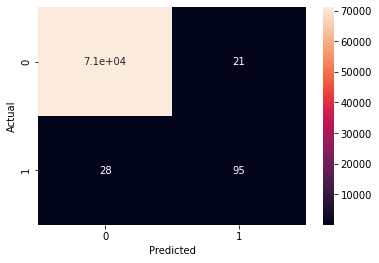

In [103]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

#### Acuracia do Modelo

In [66]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.9993118170837898


#### Nossa base é desbalanceada lembra, então a acurácia nesse caso não é a melhor métrica de avaliação do modelo.

- Relatório de Classificação - Recall

In [68]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.82      0.77      0.79       123

    accuracy                           1.00     71202
   macro avg       0.91      0.89      0.90     71202
weighted avg       1.00      1.00      1.00     71202



- Matriz de confusão

In [70]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0        71058   21  71079
1           28   95    123
All      71086  116  71202


- FAZER BALENCIAMENTO DAS CLASSES

#### Aplicando NearMiss - Método de Undersampling - Iguala as quantidade de amostras entre as classes.

In [74]:
nr = NearMiss()

In [76]:
X, y = nr.fit_resample(X, y)

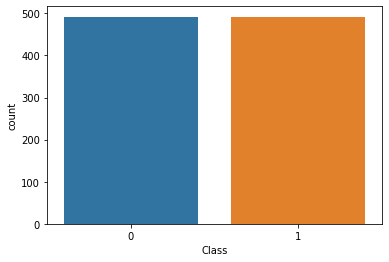

In [77]:
ax = sns.countplot(x=y)

In [84]:
amostra = X.copy()

In [86]:
amostra['target'] = y

In [91]:
amostra.target.value_counts()

0    492
1    492
Name: target, dtype: int64

In [95]:
r = list(range(1,len(amostra.target)+1))#range para os ID

In [98]:
amostra.insert(0, "ID", r, allow_duplicates=False) #Inserindo um ID para usar no SAS Regreção Logistica

In [99]:
amostra

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,1,76866.0,1.257227,0.408096,0.319266,0.685011,-0.302937,-1.052552,0.136991,-0.245655,...,-0.279430,-0.770134,0.119789,0.360130,0.241921,0.092261,-0.018228,0.032361,1.78,0
1,2,76868.0,1.254775,0.375340,0.311959,0.691077,-0.343494,-1.065252,0.110222,-0.222721,...,-0.283275,-0.803506,0.124643,0.354395,0.226835,0.093208,-0.021100,0.031686,2.69,0
2,3,76870.0,-1.050697,1.500753,0.846326,-0.282956,0.059866,-0.561182,0.484517,0.181547,...,-0.335560,-0.780232,-0.027029,-0.090180,-0.022896,0.091830,0.547241,0.278780,1.29,0
3,4,76866.0,1.245537,0.419648,0.312943,1.111459,-0.205612,-0.950912,0.267398,-0.274685,...,0.035687,0.186705,-0.107300,0.417887,0.712330,-0.330843,0.018576,0.021871,3.99,0
4,5,76870.0,1.261137,0.304662,0.527018,0.612765,-0.411488,-0.972770,0.112838,-0.248052,...,-0.249081,-0.683649,0.126936,0.395307,0.243448,0.092344,-0.024149,0.020589,1.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,980,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,981,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,982,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,983,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
Treino_sas.to_csv('content/creditcard_treino_sas.csv', index=False)

# 5° Avaliando a Máquina Preditiva

In [19]:
teste1 = {
    'Time': 161778, 
    'V1': -1.3598071336738, 
    'V2': -0.07278117330984, 
    'V3': 2.53634673796914, 
    'V4': 1.37815522427443, 
    'V5': 0.33832076994251, 
    'V6': 0.46238777776229, 
    'V7': 0.23959855406125, 
    'V8': 0.09869790126105, 
    'V9': 0.36378696961121, 
    'V10': 0.09079417197893, 
    'V11': -0.55159953326081, 
    'V12': -0.61780085576234, 
    'V13': -0.9913898472354, 
    'V14': -0.31116935369987, 
    'V15': 1.46817697209427, 
    'V16': -0.47040052525947, 
    'V17': 0.20797124192924, 
    'V18': 0.02579058019855, 
    'V19': 0.40399296025573, 
    'V20': 0.2514120982397, 
    'V21': -0.01830677794415, 
    'V22': 0.27783757555889, 
    'V23': -0.11047391018876, 
    'V24': 0.06692807491467, 
    'V25': 0.12853935827352, 
    'V26': -0.18911484388882, 
    'V27': 0.13355837674038, 
    'V28': -0.02105305345382, 
    'Amount': 149.62
}

In [20]:
dft = pd.DataFrame(data = teste1,index=[0])
print(dft)
resultado = logistic_regression.predict(dft)
print(resultado) # Normal - Acertou

     Time        V1        V2        V3        V4        V5        V6  \
0  161778 -1.359807 -0.072781  2.536347  1.378155  0.338321  0.462388   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.239599  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474   

        V24       V25       V26       V27       V28  Amount  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62  

[1 rows x 30 columns]
[0]


In [21]:
teste2 = {
    'Time': 406, 
    'V1': -2.3122265423263, 
    'V2': 1.95199201064158, 
    'V3': -1.60985073229769, 
    'V4': 3.9979055875468, 
    'V5': -0.52218786466776, 
    'V6': -1.42654531920595, 
    'V7': -2.53738730624579, 
    'V8': 1.39165724829804, 
    'V9': -2.77008927719433, 
    'V10': -2.77227214465915, 
    'V11': 3.20203320709635, 
    'V12': -2.89990738849473, 
    'V13': -0.5952218813246, 
    'V14': -4.28925378244217, 
    'V15': 0.38972412027448, 
    'V16': -1.14074717980657, 
    'V17': -2.83005567450437, 
    'V18': -0.01682246818082, 
    'V19': 0.4169557050379, 
    'V20': 0.12691055906147, 
    'V21': 0.51723237086176, 
    'V22': -0.03504936860529, 
    'V23': -0.46521107618238, 
    'V24': 0.32019819851452, 
    'V25': 0.04451916747317, 
    'V26': 0.1778397982844, 
    'V27': 0.26114500256767, 
    'V28': -0.14327587469891, 
    'Amount': 0
}

In [52]:
dft = pd.DataFrame(data = teste2,index=[0])
print(dft)
resultado2 = logistic_regression.predict(dft)
print(resultado2) # Fraude - Acertou - 

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545 -2.537387   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  1.391657 -2.770089  ...  0.126911  0.517232 -0.035049 -0.465211  0.320198   

        V25      V26       V27       V28  Amount  
0  0.044519  0.17784  0.261145 -0.143276       0  

[1 rows x 30 columns]
[1]
